In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os
import gc
from IPython.core.display import display, HTML, display_pretty
import matplotlib.pyplot as plt
os.chdir('/home/sambeet/data/dsg/')

In [2]:
os.listdir('/home/sambeet/data/dsg/')

['submission_sambeet_10.csv',
 '.ipynb_checkpoints',
 'dsg_exploration.ipynb',
 'MarketData_Macro.csv',
 'submission_sambeet_5.csv',
 'sample_submission.csv',
 'undersampling.py.ipynb',
 'Trade.csv',
 'Customer.csv',
 'submission_sambeet_7.csv',
 'submission_sambeet_4.csv',
 'submission_sambeet_9.csv',
 'Isin.csv',
 '.idea',
 'submission_sambeet_1.csv',
 'submission_sambeet_6.csv',
 'altair-data-951ca2f7-55a1-4c46-bc2f-bb0dd17290ed.json',
 'dsg_modelling.ipynb',
 'submission_sambeet_2.csv',
 'trainAdverserialFile.csv',
 'submission_sambeet_8.csv',
 'dsg_modelling-Copy1.ipynb',
 'Market.csv',
 'Challenge_20180423.csv',
 'submission_sambeet_3.csv']

Reading data and converting to categorical

In [3]:
trade = pd.read_csv('Trade.csv',parse_dates=['TradeDateKey'])
trade['BuySell'] = trade['BuySell'].astype('category')
trade['TradeStatus'] = trade['TradeStatus'].astype('category')
trade['CustomerInterest'] = trade['CustomerInterest'].astype('bool')

In [4]:
trade.head()

,TradeDateKey,CustomerIdx,IsinIdx,BuySell,NotionalEUR,Price,TradeStatus,CustomerInterest
0,2016-12-07,2789,8478,Sell,653168.0,0.0,Unknown,True
1,2017-03-29,2574,14562,Buy,1656487.0,0.0,Unknown,True
2,2017-04-18,2574,4747,Buy,939673.0,0.0,Unknown,True
3,2017-03-10,2574,9885,Sell,708082.0,0.0,Unknown,True
4,2016-11-16,2574,8885,Buy,1147709.0,0.0,Unknown,True


Reading supplement data and convert to categorical

In [4]:
marketdata = pd.read_csv('Market.csv',parse_dates=['DateKey'])
macromarketdata = pd.read_csv('MarketData_Macro.csv',parse_dates=['DateKey'])
customer = pd.read_csv('Customer.csv')
categorical_columns = ['Sector','Subsector','Region','Country']
for col in categorical_columns:
    customer[col] = customer[col].astype('category')
bond = pd.read_csv('Isin.csv',parse_dates=['ActualMaturityDateKey', 'IssueDateKey'])
categorical_columns = ['Seniority','Currency','ActivityGroup','Region','Activity',
       'RiskCaptain','Owner','CompositeRating','IndustrySector','IndustrySubgroup','MarketIssue','CouponType']
for col in categorical_columns:
    bond[col] = bond[col].astype('category')

In [5]:
trade['year'] = trade.TradeDateKey.dt.year
trade['month'] = trade.TradeDateKey.dt.month
trade['day'] = trade.TradeDateKey.dt.day
trade['weekday'] = trade.TradeDateKey.dt.dayofweek
trade['weekofyear'] = trade.TradeDateKey.dt.weekofyear
trade['quarter'] = trade.TradeDateKey.dt.quarter

In [7]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20,5)

CustomerInterest - 67% not showing any interest

In [8]:
100*trade.groupby('CustomerInterest')['year'].count()/trade.shape[0]

CustomerInterest
False    67.288936
True     32.711064
Name: year, dtype: float64

Count of days, months, year, weekday and quarter

Year - We only have four months of data for 2018 hence less

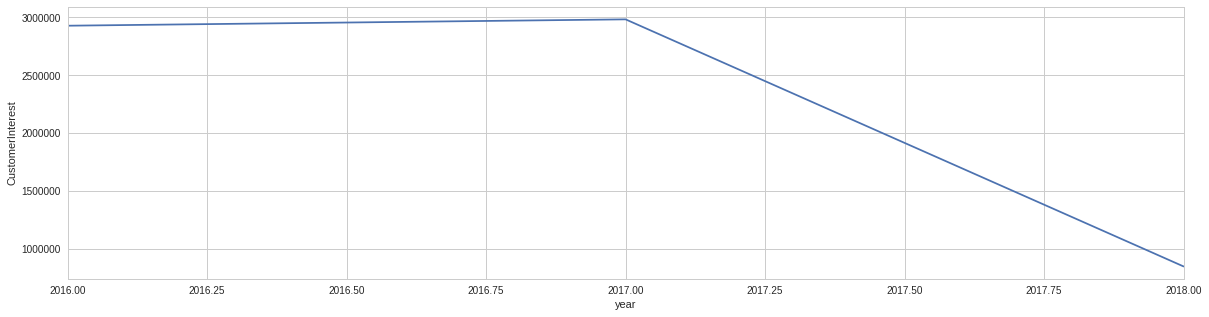

In [9]:
x = trade.groupby('year')['CustomerInterest'].count().reset_index()
x['Dummy'] = 0
sns.tsplot(data=x,time='year',value='CustomerInterest',unit='Dummy')

Quarter - More instances of quarter one

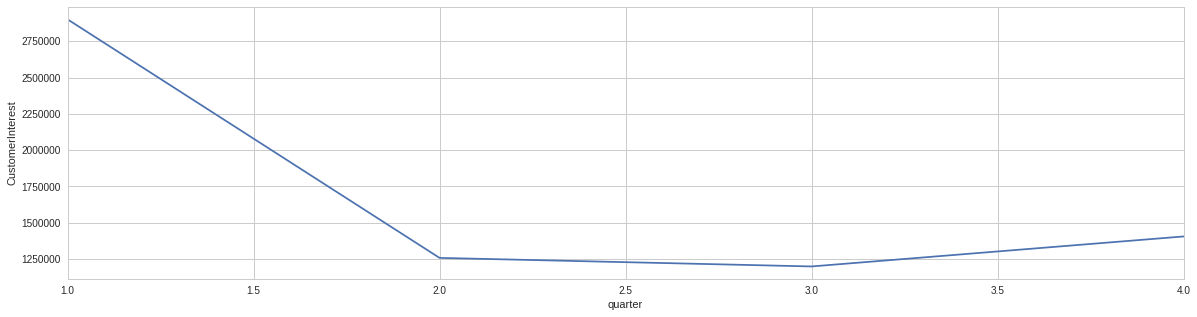

In [10]:
x = trade.groupby('quarter')['CustomerInterest'].count().reset_index()
x['Dummy'] = 0
sns.tsplot(data=x,time='quarter',value='CustomerInterest',unit='Dummy')

Month - Higher number of points for Q1

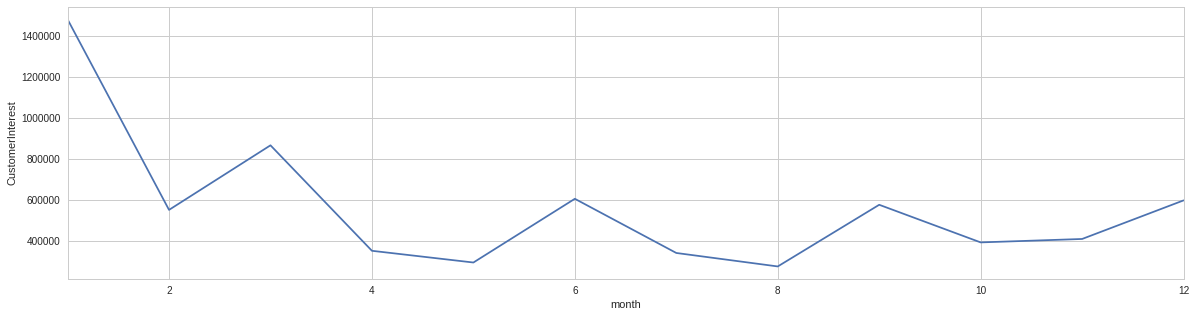

In [11]:
x = trade.groupby('month')['CustomerInterest'].count().reset_index()
x['Dummy'] = 0
sns.tsplot(data=x,time='month',value='CustomerInterest',unit='Dummy')

Day of month - Higher number of transactions (datapoints) during the start of the month and end of the month 

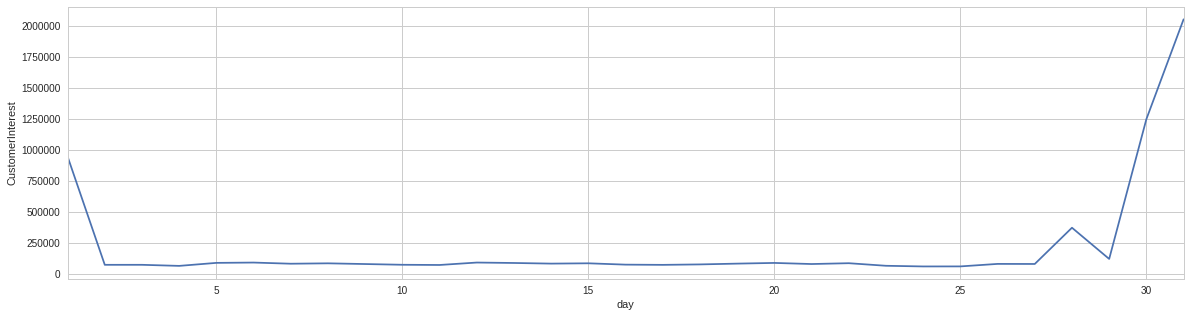

In [12]:
x = trade.groupby('day')['CustomerInterest'].count().reset_index()
x['Dummy'] = 0
sns.tsplot(data=x,time='day',value='CustomerInterest',unit='Dummy')

Weekday - Maximum count on Friday

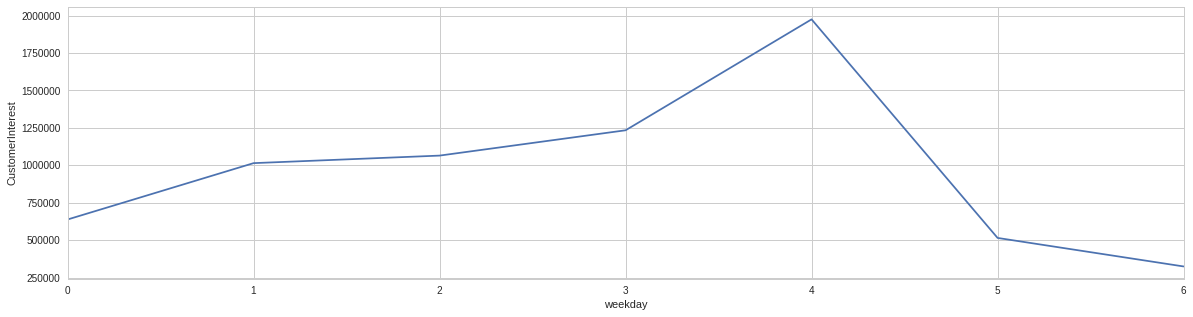

In [13]:
x = trade.groupby('weekday')['CustomerInterest'].count().reset_index()
x['Dummy'] = 0
sns.tsplot(data=x,time='weekday',value='CustomerInterest',unit='Dummy')

Avg. Conversion Rate of days, months, year, weekday and quarter

Year - Avg. Customer Interest has increase steeply with year on year

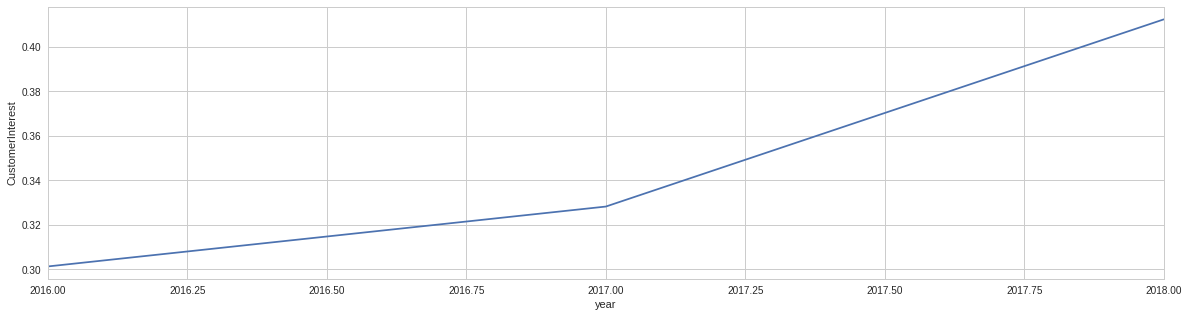

In [14]:
x = trade.groupby('year')['CustomerInterest'].mean().reset_index()
x['Dummy'] = 0
sns.tsplot(data=x,time='year',value='CustomerInterest',unit='Dummy')

Quarter - Least Conversion Rate for Q1 and Highest for Q2

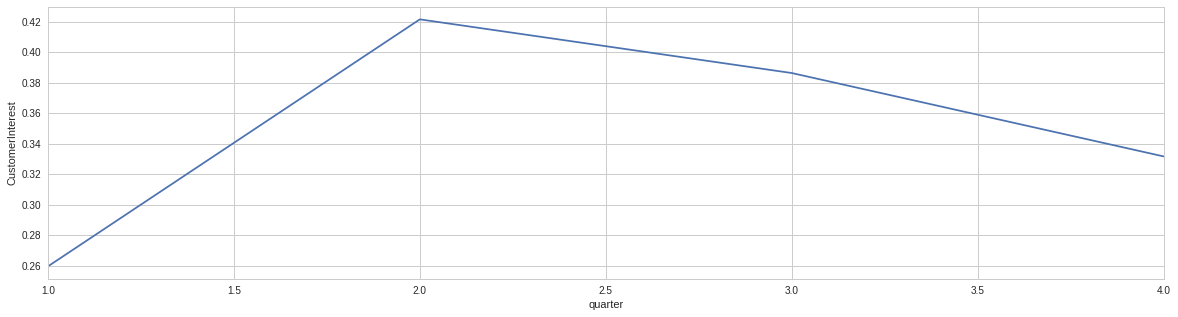

In [15]:
x = trade.groupby('quarter')['CustomerInterest'].mean().reset_index()
x['Dummy'] = 0
sns.tsplot(data=x,time='quarter',value='CustomerInterest',unit='Dummy')

Month - Conversion Rate peaks during April and lowest during January and December

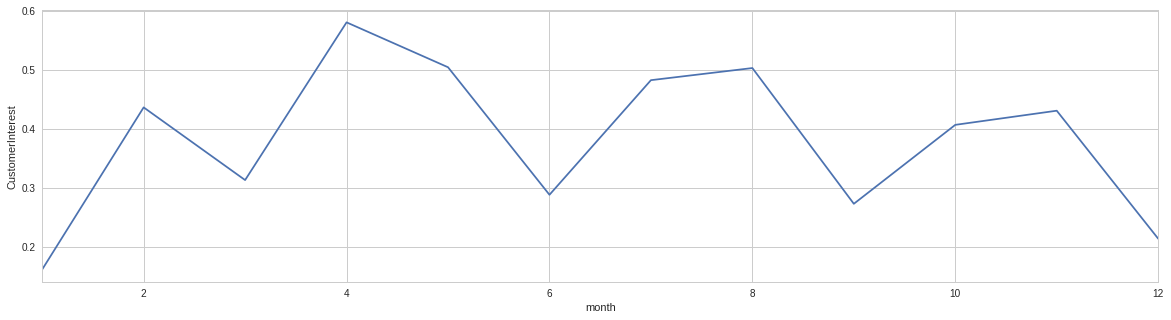

In [16]:
x = trade.groupby('month')['CustomerInterest'].mean().reset_index()
x['Dummy'] = 0
sns.tsplot(data=x,time='month',value='CustomerInterest',unit='Dummy')

Day of month - Lowest Conversion Rate on the start of the month and close of the month

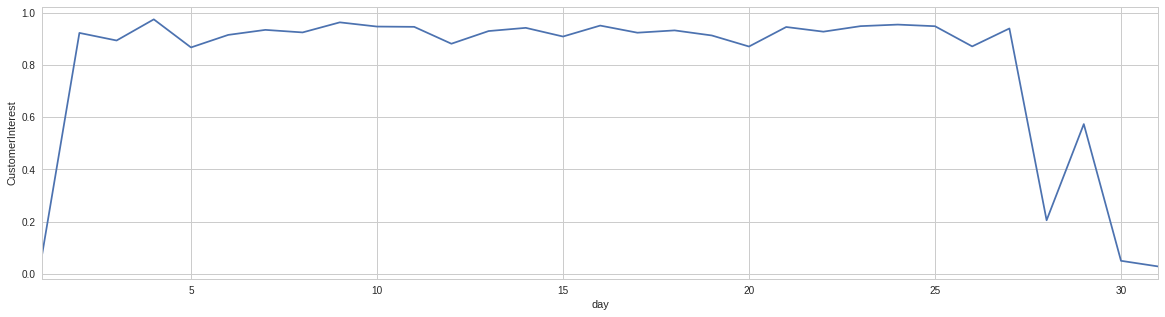

In [17]:
x = trade.groupby('day')['CustomerInterest'].mean().reset_index()
x['Dummy'] = 0
sns.tsplot(data=x,time='day',value='CustomerInterest',unit='Dummy')

Weekday - Highest Conversion Rate on Monday and Lowest on weekends

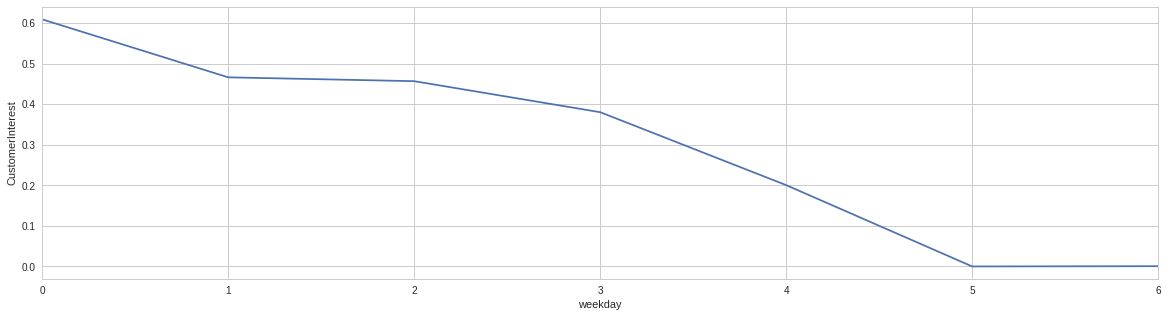

In [18]:
x = trade.groupby('weekday')['CustomerInterest'].mean().reset_index()
x['Dummy'] = 0
sns.tsplot(data=x,time='weekday',value='CustomerInterest',unit='Dummy')

Let's analyse BuySell - Buy (Sell) means the Customer would like to buy (sell) the Bond

More data for Buying

In [19]:
trade.groupby('BuySell')['CustomerInterest'].count().reset_index()

,BuySell,CustomerInterest
0,Buy,3695951
1,Sell,3066070


Doesn't have any effect on Customer Interest

In [20]:
trade.groupby('BuySell')['CustomerInterest'].mean().reset_index()

,BuySell,CustomerInterest
0,Buy,0.323567
1,Sell,0.331382


Let's analyse NotionalEUR

Higher Notional EUR where Customers have shown interest

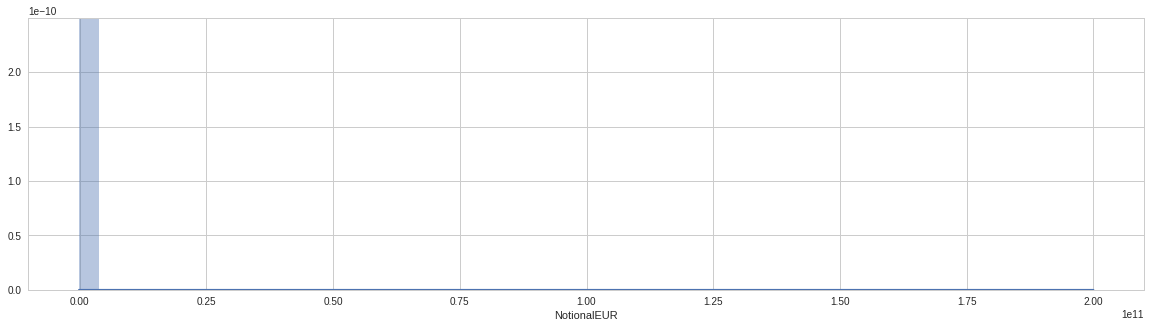

In [21]:
sns.distplot(trade.NotionalEUR)

In [22]:
trade.groupby('CustomerInterest')['NotionalEUR'].mean().reset_index()

,CustomerInterest,NotionalEUR
0,False,3.889776e+06
1,True,1.129844e+07


/home/sambeet/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


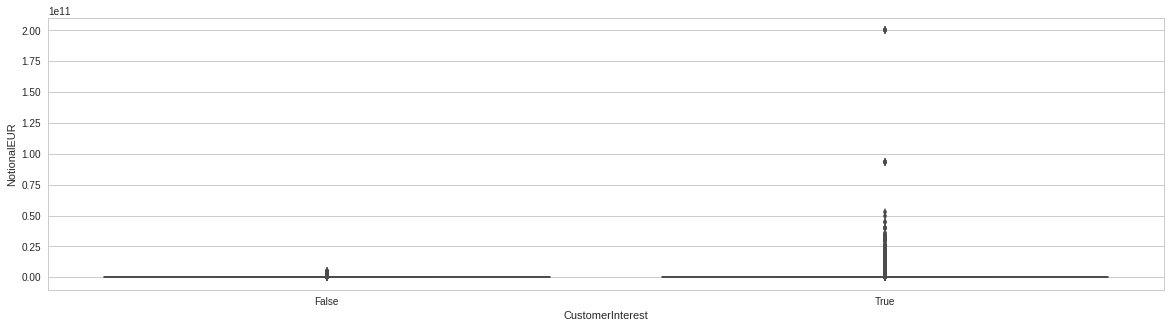

In [23]:
sns.boxplot(x="CustomerInterest", y="NotionalEUR", data=trade)

Let's analyse Price

Price not available where No interest was shown, also set to a stupid value for some

In [24]:
trade.groupby('CustomerInterest')['Price'].mean().reset_index()

,CustomerInterest,Price
0,False,NaN
1,True,177900.759352


Let's analyse TradeStatus

Highest count for Type Holding followed by Unknown - Holding is not a part of CustomerInterest==True

In [25]:
trade.groupby('TradeStatus')['CustomerInterest'].count().reset_index()

,TradeStatus,CustomerInterest
0,Done,731815
1,Holding,4550092
2,IOI,15495
3,NotTraded,293175
4,Unknown,1171444


In [26]:
trade.groupby('TradeStatus')['CustomerInterest'].mean().reset_index()

,TradeStatus,CustomerInterest
0,Done,True
1,Holding,False
2,IOI,True
3,NotTraded,True
4,Unknown,True


Joining trade data with bond data, bond market data, customer data (Leaving macromarket data for now)

In [6]:
marketdata = marketdata.rename({'DateKey':'TradeDateKey','Price':'BondPrice'},axis=1)
marketdata.head()
trade = trade.merge(marketdata,on=['IsinIdx','TradeDateKey'],how='left')

In [7]:
customer = customer.rename({'Region':'CustomerRegion'},axis=1)
trade = trade.merge(customer,on=['CustomerIdx'],how='left')

In [8]:
bond = bond.rename({'Region':'BondRegion'},axis=1)
trade = trade.merge(bond,on=['IsinIdx'],how='left')

In [9]:
del customer, marketdata, bond
gc.collect()

74

Create Variables for Time since Issued and Time till Maturity

Has 5.5% data which have been issued after TradeDate

In [10]:
trade['days_issued'] = (trade['TradeDateKey'] - trade['IssueDateKey']).dt.days
np.mean(trade.days_issued < 0)

0.055547002885675746

Has 1% data maturing before TradeDate

In [11]:
trade['days_maturity'] = (trade['ActualMaturityDateKey'] - trade['TradeDateKey']).dt.days
np.mean(trade.days_maturity < 0)

0.010179648954062698

Let's analyse the newly joined Columns

Bond Market Data

Bond/Product Price on trade day - 34% Missing Values - No significant effect on CustomerInterest

In [33]:
trade.BondPrice.describe()

count    4.483884e+06
mean     1.048727e+02
std      1.035377e+01
min      1.500000e-01
25%      1.001490e+02
50%      1.026880e+02
75%      1.073460e+02
max      2.121970e+02
Name: BondPrice, dtype: float64

In [34]:
np.mean(trade.BondPrice.isnull())

0.3369017931177676

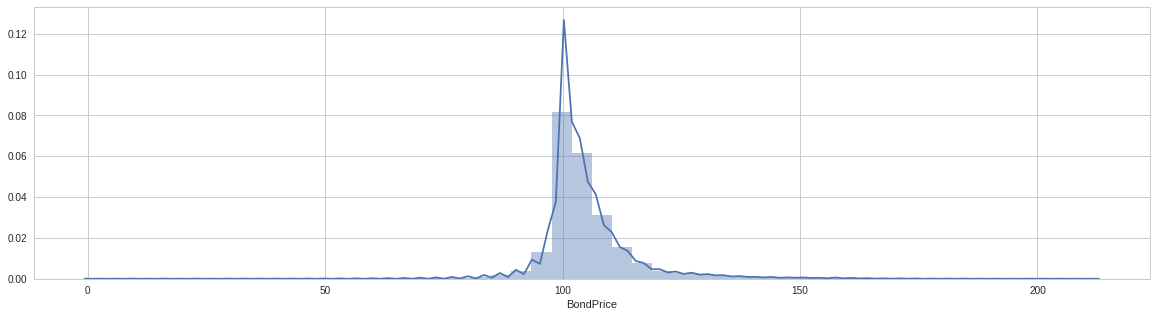

In [35]:
sns.distplot(trade.BondPrice[trade.BondPrice.notnull()])

In [36]:
trade.groupby('CustomerInterest')['BondPrice'].mean().reset_index()

,CustomerInterest,BondPrice
0,False,105.539235
1,True,104.005852


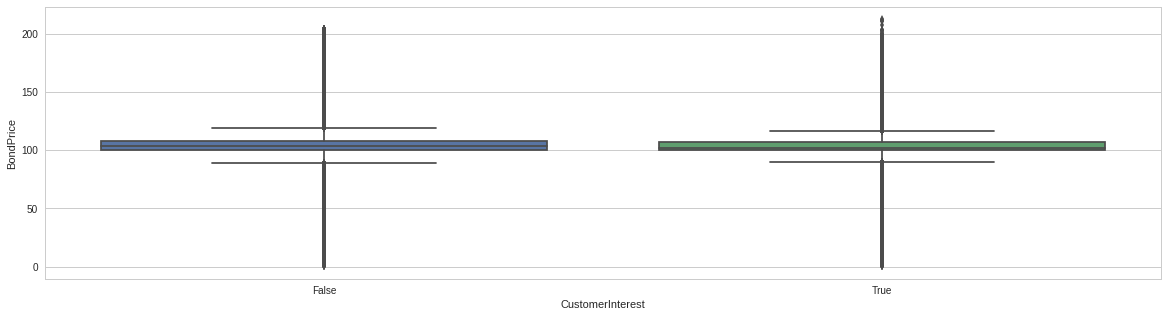

In [37]:
sns.boxplot(x="CustomerInterest", y="BondPrice", data=trade)

Yield - Yearly expected return on investment - 34% Missing Values - Highly skewed distribution - Higher Yield has higher CustomerInterest

In [38]:
trade.Yield.describe()

count    4.483884e+06
mean     1.530425e+01
std      3.363478e+03
min     -3.958243e+03
25%      9.720000e-01
50%      2.414000e+00
75%      3.963000e+00
max      2.665476e+06
Name: Yield, dtype: float64

In [39]:
np.mean(trade.Yield.isnull())

0.3369017931177676

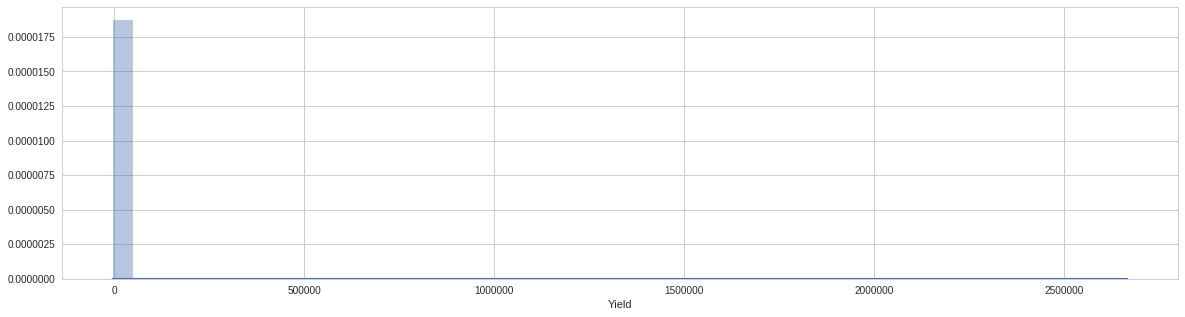

In [40]:
sns.distplot(trade.Yield[trade.Yield.notnull()])

In [41]:
#Mean is a lie, check median :D
trade.groupby('CustomerInterest')['Yield'].mean().reset_index()

,CustomerInterest,Yield
0,False,8.652213
1,True,23.955125


In [42]:
trade.groupby('CustomerInterest')['Yield'].median().reset_index()

,CustomerInterest,Yield
0,False,2.179
1,True,2.673


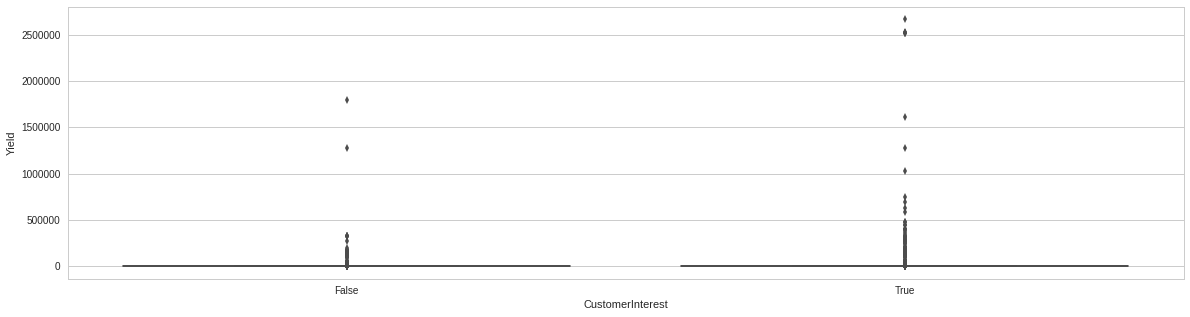

In [43]:
sns.boxplot(x="CustomerInterest", y="Yield", data=trade)

ZSpread - Difference between the Yield of the Bond and the corresponding Risk-Free rate expressed in Percent - 34% Missing values - Highly Skewed - Slight effect on CustomerInterest

In [44]:
trade.ZSpread.describe()

count    4.483884e+06
mean     2.798833e+02
std      8.877416e+04
min     -2.450880e+02
25%      3.260000e-01
50%      1.008000e+00
75%      2.235000e+00
max      7.570899e+07
Name: ZSpread, dtype: float64

In [45]:
np.mean(trade.ZSpread.isnull())

0.3369017931177676

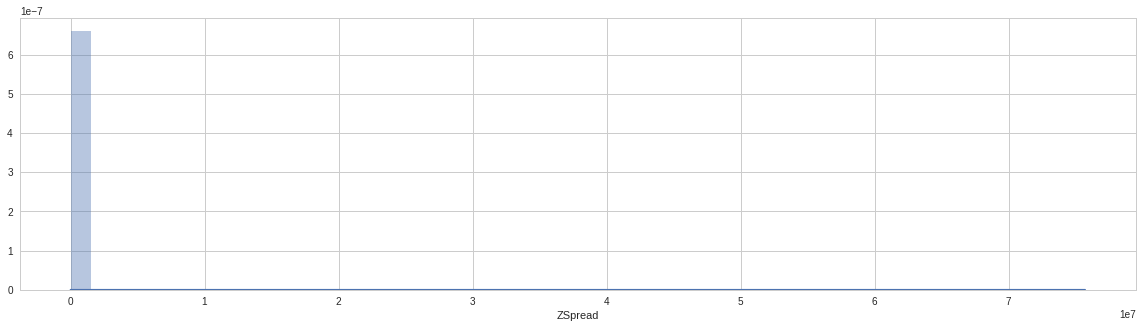

In [46]:
sns.distplot(trade.ZSpread[trade.ZSpread.notnull()])

In [47]:
trade.groupby('CustomerInterest')['ZSpread'].mean().reset_index()

,CustomerInterest,ZSpread
0,False,213.808283
1,True,365.812841


In [48]:
trade.groupby('CustomerInterest')['ZSpread'].median().reset_index()

,CustomerInterest,ZSpread
0,False,0.943
1,True,1.089


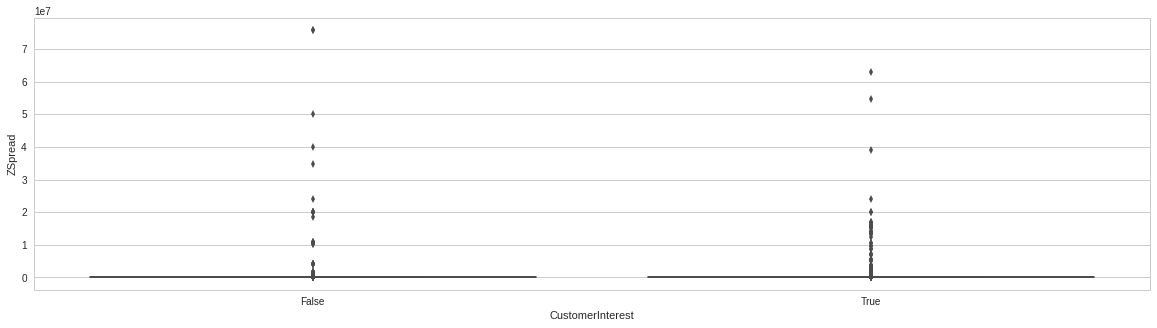

In [49]:
sns.boxplot(x="CustomerInterest", y="ZSpread", data=trade)

Customer Data

Sector - Mostly Asset Managers and Hedge Funds and Banks - Banks more likely to show interest than Asset Managers

In [50]:
trade.groupby('Sector')['CustomerInterest'].count().reset_index()

,Sector,CustomerInterest
0,Asset Managers & Hedge Funds,4883710
1,Asset Owners,374864
2,Banks and Intermediaries,1430945
3,Corporation,9320
4,Official Institution - OI,63182


In [51]:
trade.groupby('Sector')['CustomerInterest'].mean().reset_index()

,Sector,CustomerInterest
0,Asset Managers & Hedge Funds,0.290566
1,Asset Owners,0.224983
2,Banks and Intermediaries,0.458134
3,Corporation,0.579936
4,Official Institution - OI,0.753063


Subsector - Effecting Customer Interest 

In [52]:
trade.groupby('Subsector')['CustomerInterest'].count().reset_index()

,Subsector,CustomerInterest
0,Asset Manager of Private Bank,16251
1,Asset Mgr owned by Bank/Insur.,2509304
2,Bank,973933
3,Broker Dealer,147085
4,Corp - Agribusiness,392
5,Corp - Aviation,6
6,Corp - Chemicals,132
7,Corp - Comm. & Prof. Services,418
8,Corp - Conglomerate,1
9,"Corp - Cons. Durables, Apparel",4


In [53]:
trade.groupby('Subsector')['CustomerInterest'].mean().reset_index()

,Subsector,CustomerInterest
0,Asset Manager of Private Bank,0.205772
1,Asset Mgr owned by Bank/Insur.,0.269444
2,Bank,0.416076
3,Broker Dealer,0.704953
4,Corp - Agribusiness,1.000000
5,Corp - Aviation,1.000000
6,Corp - Chemicals,1.000000
7,Corp - Comm. & Prof. Services,1.000000
8,Corp - Conglomerate,1.000000
9,"Corp - Cons. Durables, Apparel",1.000000


CustomerRegion - Majority instances from America and Europe - Lower Interest in Europe, Middle East and Africa 

In [54]:
trade.groupby('CustomerRegion')['CustomerInterest'].count().reset_index()

,CustomerRegion,CustomerInterest
0,Americas,2431177
1,Asia Pacific,209467
2,"Europe, Middle East and Africa",4121377


In [55]:
trade.groupby('CustomerRegion')['CustomerInterest'].mean().reset_index()

,CustomerRegion,CustomerInterest
0,Americas,0.412292
1,Asia Pacific,0.569703
2,"Europe, Middle East and Africa",0.264533


Country of Customer - Majority instances from USA and UK - 41% Avg. Interest in USA vs 19% in UK 

In [56]:
trade.groupby('Country')['CustomerInterest'].count().reset_index()

,Country,CustomerInterest
0,ALGERIA,15
1,ANDORRA,1784
2,ARGENTINA,844
3,ARMENIA,46
4,AUSTRALIA,11670
5,AUSTRIA,80692
6,BAHAMAS,2227
7,BAHREIN,59
8,BARBADOS,6
9,BELGIUM,88812


In [210]:
trade.groupby('Country')['CustomerInterest'].mean().reset_index()

,Country,CustomerInterest
0,ALGERIA,1.000000
1,ANDORRA,0.997197
2,ARGENTINA,1.000000
3,ARMENIA,1.000000
4,AUSTRALIA,0.173522
5,AUSTRIA,0.232749
6,BAHAMAS,1.000000
7,BAHREIN,1.000000
8,BARBADOS,1.000000
9,BELGIUM,0.189839


Bond data

TickerIdx

In [62]:
len(np.unique(trade.TickerIdx))

3543

Seniority

In [63]:
trade.groupby('Seniority')['CustomerInterest'].count().reset_index()

,Seniority,CustomerInterest
0,ASS,890
1,COL,9
2,GOV,751759
3,MOR,7356
4,SEC,288094
5,SEN,4958003
6,SUB,730442
7,SUK,13680
8,WHO,11788


In [64]:
trade.groupby('Seniority')['CustomerInterest'].mean().reset_index()

,Seniority,CustomerInterest
0,ASS,0.056180
1,COL,1.000000
2,GOV,0.336009
3,MOR,0.052066
4,SEC,0.326768
5,SEN,0.322337
6,SUB,0.354526
7,SUK,0.479605
8,WHO,0.091619


Currency

In [66]:
trade.groupby('Currency')['CustomerInterest'].count().reset_index()

,Currency,CustomerInterest
0,ARO,3961
1,ARS,2567
2,AUD,3931
3,BRL,749
4,CAD,949
5,CHF,59815
6,CNH,659
7,CNO,3052
8,CNY,7230
9,DEM,5


In [67]:
trade.groupby('Currency')['CustomerInterest'].mean().reset_index()

,Currency,CustomerInterest
0,ARO,0.290331
1,ARS,0.375146
2,AUD,0.040956
3,BRL,0.122830
4,CAD,0.008430
5,CHF,0.057226
6,CNH,1.000000
7,CNO,1.000000
8,CNY,0.282158
9,DEM,1.000000


ActivityGroup

In [68]:
trade.groupby('ActivityGroup')['CustomerInterest'].count().reset_index()

,ActivityGroup,CustomerInterest
0,FLOW G10,4996369
1,FLOW LOCAL MARKET,1088613
2,SAS & COVERED BONDS,677039


In [69]:
trade.groupby('ActivityGroup')['CustomerInterest'].mean().reset_index()

,ActivityGroup,CustomerInterest
0,FLOW G10,0.308203
1,FLOW LOCAL MARKET,0.441318
2,SAS & COVERED BONDS,0.283013


BondRegion

In [70]:
trade.groupby('BondRegion')['CustomerInterest'].count().reset_index()

,BondRegion,CustomerInterest
0,AMERICAS,2560951
1,ASIA-TOKYO,393574
2,CHF SAS,56624
3,EUR COVERED,162573
4,EUR SAS,220536
5,EUROPE,3130457
6,GBP SAS,35868
7,USD SAS,201438


In [71]:
trade.groupby('BondRegion')['CustomerInterest'].mean().reset_index()

,BondRegion,CustomerInterest
0,AMERICAS,0.379447
1,ASIA-TOKYO,0.454753
2,CHF SAS,0.057838
3,EUR COVERED,0.389050
4,EUR SAS,0.217602
5,EUROPE,0.277785
6,GBP SAS,0.122895
7,USD SAS,0.360855


Activity

In [72]:
trade.groupby('Activity')['CustomerInterest'].count().reset_index()

,Activity,CustomerInterest
0,ARGENTINA,64462
1,ASIA,7
2,ASIA MARKET MAKING,358525
3,CDS AND HY,426508
4,EUR COVERED,162573
5,EUR SAS,220536
6,GBP SAS,35868
7,HG CASH,1796419
8,HIGH GRADE MARKET MAKING,31989
9,INSTITUTIONAL MARKET MAKING,2770933


In [73]:
trade.groupby('Activity')['CustomerInterest'].mean().reset_index()

,Activity,CustomerInterest
0,ARGENTINA,0.465484
1,ASIA,1.000000
2,ASIA MARKET MAKING,0.453012
3,CDS AND HY,0.219677
4,EUR COVERED,0.389050
5,EUR SAS,0.217602
6,GBP SAS,0.122895
7,HG CASH,0.409538
8,HIGH GRADE MARKET MAKING,0.422114
9,INSTITUTIONAL MARKET MAKING,0.256372


RiskCaptain

In [75]:
trade.groupby('RiskCaptain')['CustomerInterest'].count().reset_index()

,RiskCaptain,CustomerInterest
0,ARGENTINA,64462
1,ASIA HIGH YIELD,64791
2,BOND CONNECT CREDIT FLOW,8
3,CDS,17750
4,CDS AND HY,386056
5,CDS AND HY MAN,40452
6,CHF SAS,56624
7,CHINA BANKS,21766
8,CHINA CORPS,83058
9,CHINA ONSHORE,3052


In [76]:
trade.groupby('RiskCaptain')['CustomerInterest'].mean().reset_index()

,RiskCaptain,CustomerInterest
0,ARGENTINA,0.465484
1,ASIA HIGH YIELD,0.461654
2,BOND CONNECT CREDIT FLOW,1.000000
3,CDS,0.334197
4,CDS AND HY,0.225843
5,CDS AND HY MAN,0.160833
6,CHF SAS,0.057838
7,CHINA BANKS,0.556234
8,CHINA CORPS,0.502757
9,CHINA ONSHORE,1.000000


Owner

In [77]:
trade.groupby('Owner')['CustomerInterest'].count().reset_index()

,Owner,CustomerInterest
0,ASIA HIGH YIELD,64791
1,AT 1/US BANKS,2550
2,AT1,56690
3,AUD BNP ISSUES,87
4,AUSSIE FIN CASH,4043
5,AUSTRALIA,545
6,BANK CAP,21664
7,BANK FEES AND OTHER,7048
8,CDS,17118
9,CHEMS/PHARMA/AIR/DEFENCE,17864


In [78]:
trade.groupby('Owner')['CustomerInterest'].mean().reset_index()

,Owner,CustomerInterest
0,ASIA HIGH YIELD,0.461654
1,AT 1/US BANKS,0.267843
2,AT1,0.389593
3,AUD BNP ISSUES,0.310345
4,AUSSIE FIN CASH,0.443483
5,AUSTRALIA,0.045872
6,BANK CAP,0.433023
7,BANK FEES AND OTHER,0.182605
8,CDS,0.343498
9,CHEMS/PHARMA/AIR/DEFENCE,0.293775


CompositeRating

In [80]:
trade.groupby('CompositeRating')['CustomerInterest'].count().reset_index()

,CompositeRating,CustomerInterest
0,A,452624
1,A+,343878
2,A-,739918
3,AA,95986
4,AA+,76202
5,AA-,256656
6,AAA,232530
7,B,185285
8,B+,157476
9,B-,131187


In [81]:
trade.groupby('CompositeRating')['CustomerInterest'].mean().reset_index()

,CompositeRating,CustomerInterest
0,A,0.349902
1,A+,0.391912
2,A-,0.352577
3,AA,0.339893
4,AA+,0.367287
5,AA-,0.354802
6,AAA,0.361953
7,B,0.260361
8,B+,0.284215
9,B-,0.262945


IndustrySector

In [82]:
trade.groupby('IndustrySector')['CustomerInterest'].count().reset_index()

,IndustrySector,CustomerInterest
0,Asset Backed Securit,9
1,Basic Materials,280182
2,Communications,571385
3,"Consumer, Cyclical",538065
4,"Consumer, Non-cyclic",790769
5,Diversified,28541
6,Energy,515504
7,Financial,2106403
8,Government,953473
9,Industrial,405274


In [83]:
trade.groupby('IndustrySector')['CustomerInterest'].mean().reset_index()

,IndustrySector,CustomerInterest
0,Asset Backed Securit,1.000000
1,Basic Materials,0.310134
2,Communications,0.303681
3,"Consumer, Cyclical",0.295881
4,"Consumer, Non-cyclic",0.318983
5,Diversified,0.324200
6,Energy,0.355415
7,Financial,0.341466
8,Government,0.335812
9,Industrial,0.299565


IndustrySubgroup

In [84]:
trade.groupby('IndustrySubgroup')['CustomerInterest'].count().reset_index()

,IndustrySubgroup,CustomerInterest
0,Advertising Agencies,3776
1,Advertising Sales,1561
2,Advertising Services,4377
3,Aerospace/Defense,26515
4,Aerospace/Defense-Equip,17634
5,Agricultural Biotech,131
6,Agricultural Chemicals,10525
7,Agricultural Operations,7451
8,Airlines,12039
9,Airport Develop/Maint,21137


In [85]:
trade.groupby('IndustrySubgroup')['CustomerInterest'].mean().reset_index()

,IndustrySubgroup,CustomerInterest
0,Advertising Agencies,0.327595
1,Advertising Sales,0.281230
2,Advertising Services,0.309801
3,Aerospace/Defense,0.375297
4,Aerospace/Defense-Equip,0.356867
5,Agricultural Biotech,0.290076
6,Agricultural Chemicals,0.339572
7,Agricultural Operations,0.331499
8,Airlines,0.317884
9,Airport Develop/Maint,0.225245


MarketIssue

In [86]:
trade.groupby('MarketIssue')['CustomerInterest'].count().reset_index()

,MarketIssue,CustomerInterest
0,Canadian,891
1,Domestic,46444
2,Domestic mtn,129176
3,Euro mtn,2036538
4,Euro non-dollar,473740
5,Euro-dollar,553405
6,Euro-zone,774306
7,Global,1744160
8,Priv placement,442664
9,UK gilt stock,39223


In [87]:
trade.groupby('MarketIssue')['CustomerInterest'].mean().reset_index()

,MarketIssue,CustomerInterest
0,Canadian,0.015713
1,Domestic,0.228878
2,Domestic mtn,0.429708
3,Euro mtn,0.288841
4,Euro non-dollar,0.232904
5,Euro-dollar,0.467538
6,Euro-zone,0.237703
7,Global,0.402019
8,Priv placement,0.271278
9,UK gilt stock,0.083318


CouponType

In [88]:
trade.groupby('CouponType')['CustomerInterest'].count().reset_index()

,CouponType,CustomerInterest
0,FIXED,5963276
1,FLOATING,220311
2,NONE,439
3,STEP CPN,55793
4,VARIABLE,517995
5,ZERO COUPON,4207


In [89]:
trade.groupby('CouponType')['CustomerInterest'].mean().reset_index()

,CouponType,CustomerInterest
0,FIXED,0.328208
1,FLOATING,0.259547
2,NONE,0.407745
3,STEP CPN,0.320524
4,VARIABLE,0.342967
5,ZERO COUPON,0.436178


IssuedAmmount

In [90]:
trade.IssuedAmount.describe()

count    6.762021e+06
mean     2.679594e+09
std      2.247554e+10
min      0.000000e+00
25%      6.000000e+08
50%      1.000000e+09
75%      1.500000e+09
max      5.400000e+12
Name: IssuedAmount, dtype: float64

In [91]:
np.mean(trade.IssuedAmount.isnull())

0.0

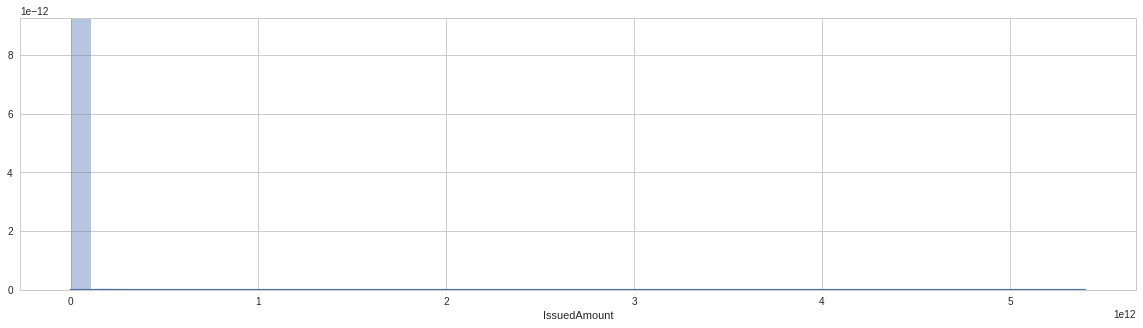

In [92]:
sns.distplot(trade.IssuedAmount)

In [93]:
trade.groupby('CustomerInterest')['IssuedAmount'].mean().reset_index()

,CustomerInterest,IssuedAmount
0,False,2.822413e+09
1,True,2.385807e+09


In [94]:
trade.groupby('CustomerInterest')['IssuedAmount'].median().reset_index()

,CustomerInterest,IssuedAmount
0,False,1.000000e+09
1,True,1.000000e+09


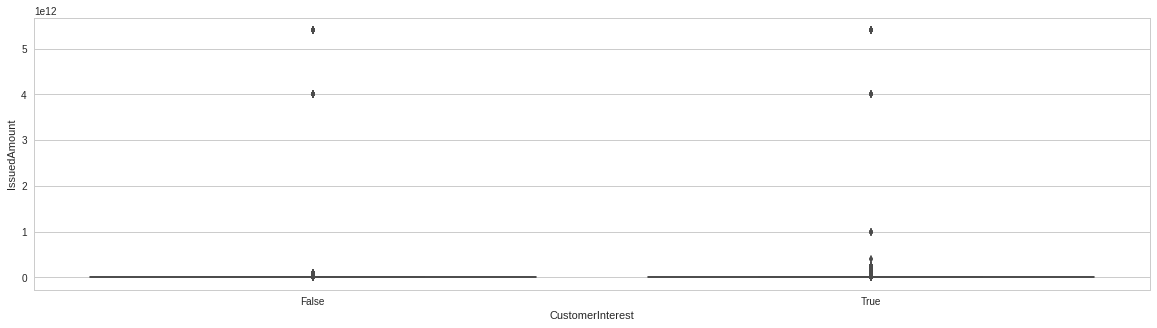

In [95]:
sns.boxplot(x="CustomerInterest", y="IssuedAmount", data=trade)

days_issued

In [96]:
trade.days_issued.describe()

count    6.762021e+06
mean     1.127382e+03
std      1.237715e+03
min     -8.680000e+02
25%      2.620000e+02
50%      8.050000e+02
75%      1.568000e+03
max      2.310000e+04
Name: days_issued, dtype: float64

In [97]:
np.mean(trade.days_issued.isnull())

0.0

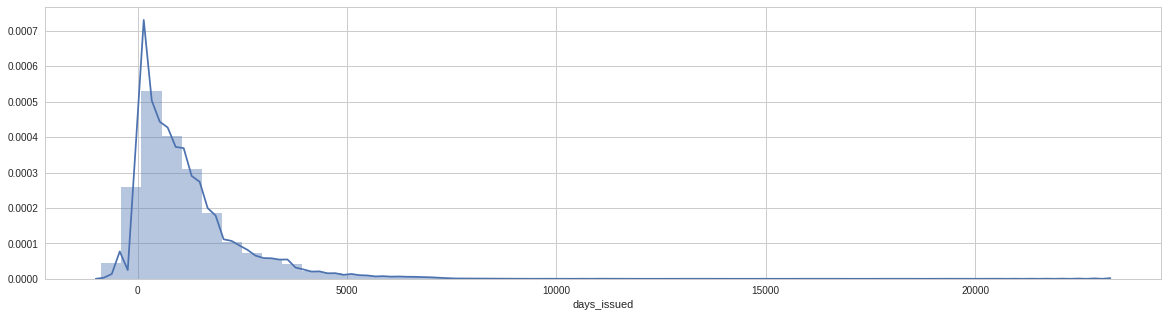

In [98]:
sns.distplot(trade.days_issued)

In [99]:
trade.groupby('CustomerInterest')['days_issued'].mean().reset_index()

,CustomerInterest,days_issued
0,False,1145.709379
1,True,1089.682030


In [100]:
trade.groupby('CustomerInterest')['days_issued'].median().reset_index()

,CustomerInterest,days_issued
0,False,820
1,True,776


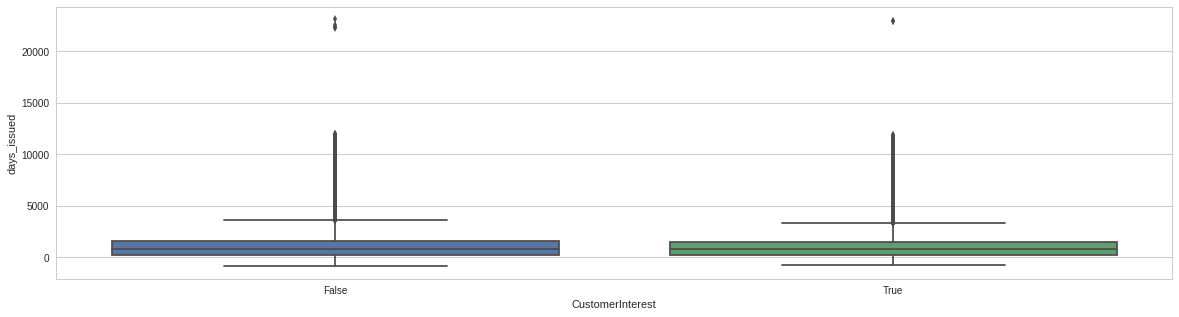

In [101]:
sns.boxplot(x="CustomerInterest", y="days_issued", data=trade)

days_maturity

In [102]:
trade.days_maturity.describe()

count    6.762021e+06
mean     2.778804e+03
std      2.908903e+03
min     -8.220000e+02
25%      1.097000e+03
50%      1.973000e+03
75%      3.229000e+03
max      5.518500e+04
Name: days_maturity, dtype: float64

In [103]:
np.mean(trade.days_maturity.isnull())

0.0

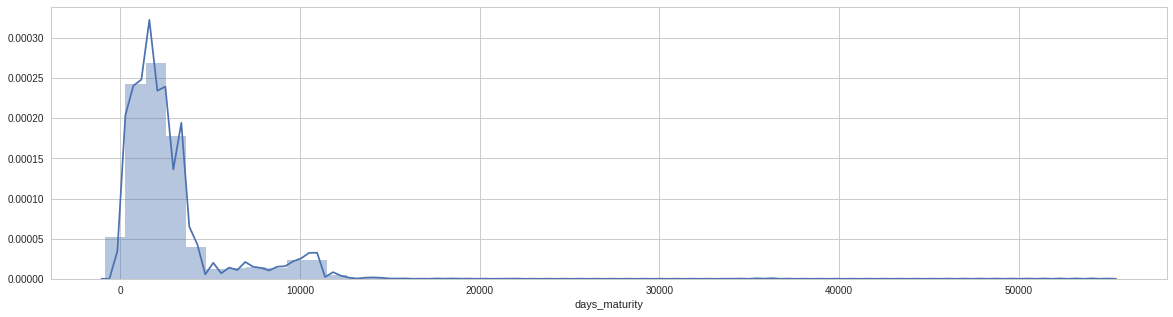

In [104]:
sns.distplot(trade.days_maturity)

In [105]:
trade.groupby('CustomerInterest')['days_maturity'].mean().reset_index()

,CustomerInterest,days_maturity
0,False,2728.080315
1,True,2883.147614


In [106]:
trade.groupby('CustomerInterest')['days_maturity'].median().reset_index()

,CustomerInterest,days_maturity
0,False,1976
1,True,1968


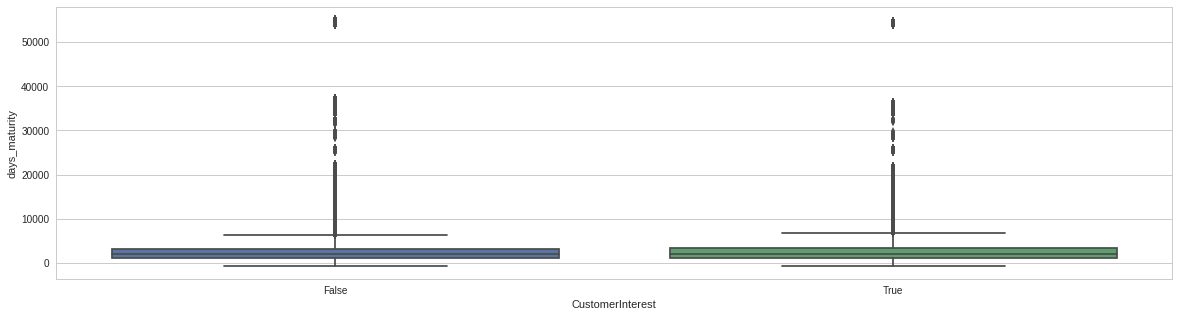

In [107]:
sns.boxplot(x="CustomerInterest", y="days_maturity", data=trade)

In [12]:
predictors = list(trade.columns)
predictors.remove('TradeDateKey')
predictors.remove('IsinIdx')
predictors.remove('Price')
predictors.remove('CustomerInterest')
predictors.remove('ActualMaturityDateKey')
predictors.remove('IssueDateKey')
predictors.remove('TradeStatus')
predictors.remove('NotionalEUR')
predictors.remove('BondPrice')
predictors.remove('Yield')
predictors.remove('ZSpread')
predictors.remove('day')
predictors.remove('weekday')
#predictors.remove('weekofyear')

target = 'CustomerInterest'
print(predictors,len(predictors),trade.shape[0])

(['CustomerIdx', 'BuySell', 'year', 'month', 'weekofyear', 'quarter', 'Sector', 'Subsector', 'CustomerRegion', 'Country', 'TickerIdx', 'Seniority', 'Currency', 'ActivityGroup', 'BondRegion', 'Activity', 'RiskCaptain', 'Owner', 'CompositeRating', 'IndustrySector', 'IndustrySubgroup', 'MarketIssue', 'IssuedAmount', 'CouponType', 'days_issued', 'days_maturity'], 26, 6762021)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import lightgbm as lgb

In [4]:
test = pd.read_csv('Challenge_20180423.csv',parse_dates=['DateKey'])
test = test.rename({'DateKey':'TradeDateKey'},axis=1)
test['BuySell'] = test['BuySell'].astype('category')
test['TradeDateKey'] = '20180423'
test['TradeDateKey'] = pd.to_datetime(test.TradeDateKey)

In [15]:
marketdata = pd.read_csv('Market.csv',parse_dates=['DateKey'])
#macromarketdata = pd.read_csv('MarketData_Macro.csv',parse_dates=['DateKey'])
customer = pd.read_csv('Customer.csv')
categorical_columns = ['Sector','Subsector','Region','Country']
for col in categorical_columns:
    customer[col] = customer[col].astype('category')
bond = pd.read_csv('Isin.csv',parse_dates=['ActualMaturityDateKey', 'IssueDateKey'])
categorical_columns = ['Seniority','Currency','ActivityGroup','Region','Activity',
       'RiskCaptain','Owner','CompositeRating','IndustrySector','IndustrySubgroup','MarketIssue','CouponType']
for col in categorical_columns:
    bond[col] = bond[col].astype('category')

In [16]:
test['year'] = test.TradeDateKey.dt.year
test['month'] = test.TradeDateKey.dt.month
test['day'] = test.TradeDateKey.dt.day
test['weekday'] = test.TradeDateKey.dt.dayofweek
test['weekofyear'] = test.TradeDateKey.dt.weekofyear
test['quarter'] = test.TradeDateKey.dt.quarter

In [17]:
marketdata = marketdata.rename({'DateKey':'TradeDateKey','Price':'BondPrice'},axis=1)
marketdata.head()
test = test.merge(marketdata,on=['IsinIdx','TradeDateKey'],how='left')

In [18]:
customer = customer.rename({'Region':'CustomerRegion'},axis=1)
test = test.merge(customer,on=['CustomerIdx'],how='left')

In [19]:
bond = bond.rename({'Region':'BondRegion'},axis=1)
test = test.merge(bond,on=['IsinIdx'],how='left')

In [20]:
del customer, marketdata, bond
gc.collect()

49

In [21]:
test['days_issued'] = (test['TradeDateKey'] - test['IssueDateKey']).dt.days
test['days_maturity'] = (test['ActualMaturityDateKey'] - test['TradeDateKey']).dt.days

In [22]:
categorical_to_be_transformed = ['BuySell','Sector','Subsector','CustomerRegion', 'Country','Seniority','Currency',
                                 'ActivityGroup', 'BondRegion', 'Activity', 'RiskCaptain', 'Owner', 
                                 'CompositeRating', 'IndustrySector', 'IndustrySubgroup', 'MarketIssue','CouponType']
for feature in categorical_to_be_transformed:
    print 'Transforming {}...'.format(feature)
    encoder = LabelEncoder()
    encoder.fit(trade[feature].append(test[feature]).astype(str))    
    trade[feature] = encoder.transform(trade[feature].astype(str))
    test[feature] = encoder.transform(test[feature].astype(str))

Transforming BuySell...
Transforming Sector...
Transforming Subsector...
Transforming CustomerRegion...
Transforming Country...
Transforming Seniority...
Transforming Currency...
Transforming ActivityGroup...
Transforming BondRegion...
Transforming Activity...
Transforming RiskCaptain...
Transforming Owner...
Transforming CompositeRating...
Transforming IndustrySector...
Transforming IndustrySubgroup...
Transforming MarketIssue...
Transforming CouponType...


In [23]:
categorical = categorical_to_be_transformed + ['CustomerIdx','TickerIdx','month','quarter','weekofyear']
print(categorical)

['BuySell', 'Sector', 'Subsector', 'CustomerRegion', 'Country', 'Seniority', 'Currency', 'ActivityGroup', 'BondRegion', 'Activity', 'RiskCaptain', 'Owner', 'CompositeRating', 'IndustrySector', 'IndustrySubgroup', 'MarketIssue', 'CouponType', 'CustomerIdx', 'TickerIdx', 'month', 'quarter', 'weekofyear']


In [24]:
from imblearn.datasets import make_imbalance
trade_undersampled,customerinterest_undersampled = make_imbalance(trade,trade[target].values.astype(int),ratio={0:np.sum(trade.CustomerInterest == 0),1:np.round(0.02*np.sum(trade.CustomerInterest == 0)).astype(int)},random_state=37)

TypeError: float() argument must be a string or a number

In [25]:
gc.collect()

0

In [278]:
train_index = range(6085818)
valid_index = range(6085818,len(trade))
#valid_index = train_test_split(np.arange(len(trade)), test_size=0.1, random_state=37)

In [300]:
trade.sort_values(by='TradeDateKey',axis=0,inplace=True)
trade.reset_index(drop=True,inplace=True)

In [303]:
gc.collect()

0

In [361]:
rounds = 500
early_stop_rounds = 50
lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric' : 'auc',
    'num_leaves' : 3,
#     'max_depth': 15,
    'learning_rate' : 1e-2,
    'feature_fraction' : 0.5,
#    'bagging_fraction' : 0.6,
#    'bagging_freq' : 5,
    'verbosity' : -1,
    'num_threads' : 8,
    'min_data_in_leaf' : 10000,
    'lambda_l1' : 1,
    'lambda_l2' : 1,
#    'cat_smooth' : 50,
    'max_bin' : 20
#    'is_unbalance' : True,    
}

In [362]:
# LGBM Dataset Formatting 
train = lgb.Dataset(trade.loc[train_index,predictors].values, trade.loc[train_index,target].values,
                    feature_name=predictors,categorical_feature = categorical)
valid = lgb.Dataset(trade.loc[valid_index,predictors].values, trade.loc[valid_index,target].values,
                    feature_name=predictors,categorical_feature = categorical)

In [363]:
model = lgb.train(lgbm_params,train,num_boost_round=rounds,valid_sets=[valid],valid_names=['valid'],
                    early_stopping_rounds=early_stop_rounds,verbose_eval=50)
#del x_valid ; x_train; gc.collect()

Training until validation scores don't improve for 50 rounds.
[50]	valid's auc: 0.89374
[100]	valid's auc: 0.910434
[150]	valid's auc: 0.917732
[200]	valid's auc: 0.922042
[250]	valid's auc: 0.922585
[300]	valid's auc: 0.923623
[350]	valid's auc: 0.923278
Early stopping, best iteration is:
[314]	valid's auc: 0.924202


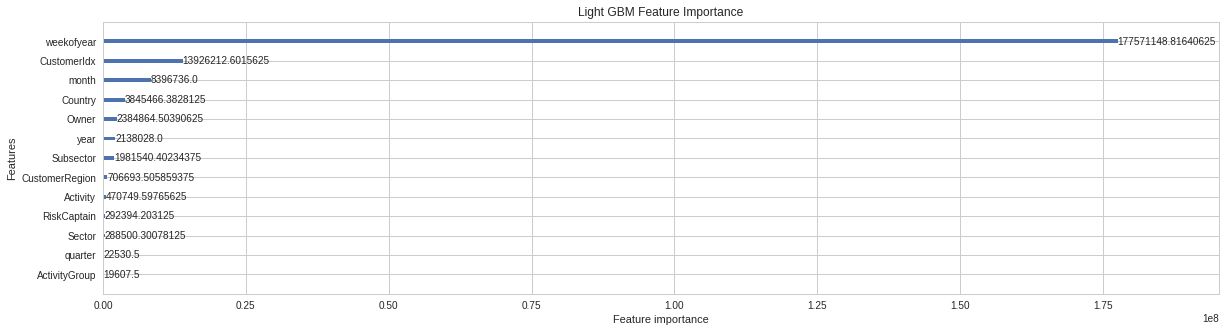

In [366]:
lgb.plot_importance(model,importance_type='gain')
plt.title("Light GBM Feature Importance")

In [231]:
test['CustomerInterest'] = model.predict(test.loc[:,predictors].values)
test[['PredictionIdx','CustomerInterest']].to_csv('submission_sambeet_3.csv', index=False)

In [5]:
trade['id'] = trade['CustomerIdx'].astype(str) + '_' + trade['IsinIdx'].astype(str)
test['id'] = test['CustomerIdx'].astype(str) + '_' + test['IsinIdx'].astype(str)

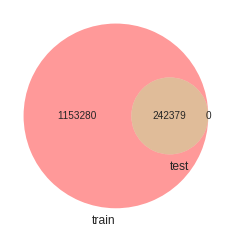

In [6]:
from matplotlib_venn import venn2
 
# Second way
venn2([set(list(trade.id)), set(list(test.id))],set_labels=['train','test'])
plt.show()

Check overlap between train and test

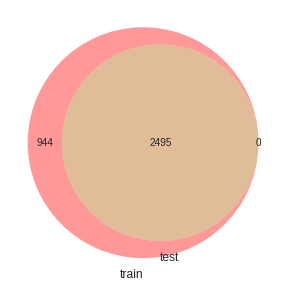

In [260]:
from matplotlib_venn import venn2
 
# Second way
venn2([set(list(trade.CustomerIdx)), set(list(test.CustomerIdx))],set_labels=['train','test'])
plt.show()

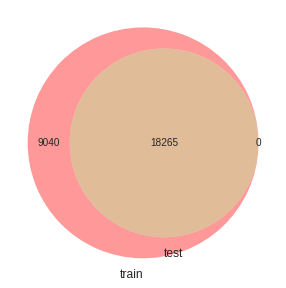

In [261]:
from matplotlib_venn import venn2
 
# Second way
venn2([set(list(trade.IsinIdx)), set(list(test.IsinIdx))],set_labels=['train','test'])
plt.show()

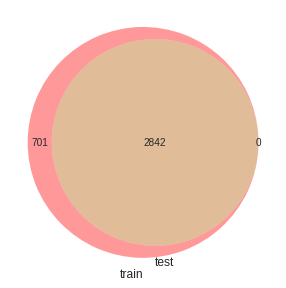

In [262]:
from matplotlib_venn import venn2
 
# Second way
venn2([set(list(trade.TickerIdx)), set(list(test.TickerIdx))],set_labels=['train','test'])
plt.show()

In [264]:
len(np.unique(test.TickerIdx))

2842